In [2]:
import copy

import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy import signal
from scipy.signal import find_peaks_cwt
from matplotlib import rcParams
from statsmodels.graphics.tsaplots import plot_acf

In [289]:
filePath = "..//..//data//"
#fileName = "output2022-04-27T15_16_04.csv"
fileName = "Raw1.csv"
data = pd.read_csv(filePath + fileName)
marked_point=np.array([0,58002,63002,57502,65002,0,0,65502,59002,0,0,48501,46502,0,65500,0,56502,0,61002,0,67002,78502,71502,80502,78501])

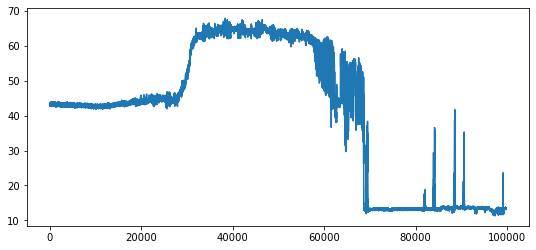

In [72]:
plt.plot(np.array(data["Item1.avgBright"]))

## 1. Hatching Point Detection

In [4]:
def knn_norm(data, k=7, mode="max"):
    lenth = len(data)
    output_list = []
    for i in range(lenth - k):
        if mode == "max":
            output_list.append((np.max(data[i:i + k])))
        elif mode == "mean":
            output_list.append((np.mean(data[i:i + k])))
        elif mode == "min":
            output_list.append((np.min(data[i:i + k])))

    return np.hstack((np.ones(lenth-len(output_list))*output_list[0],np.array(output_list)))

(-1.0, 100.0)

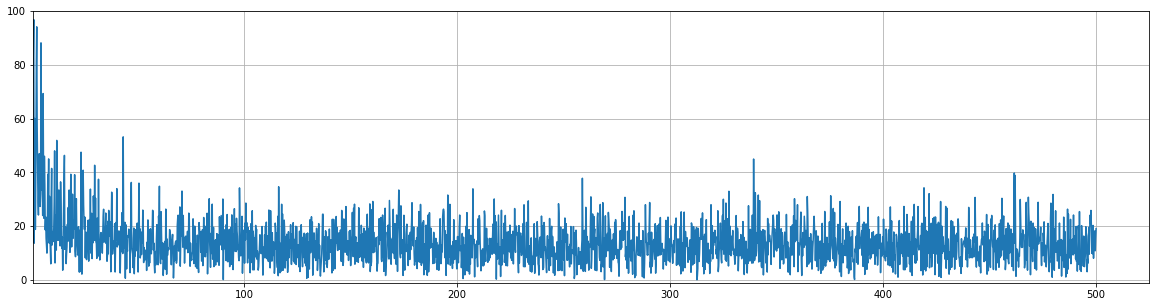

In [130]:
import scipy
from scipy.fft import rfft,rfftfreq
test1=np.array(data["Item1.avgBright"])[:5000]
plt.figure(figsize=(20,5))
n    = len(test1)
yf   = rfft(test1)
data_step=0.001
xf   = rfftfreq(n,data_step)
plt.grid()
plt.plot(xf,np.abs(yf))
plt.xlim(1)
plt.ylim(-1,100)

In [191]:

def plot_Item(data, k, hatching_point):
    f, ax = plt.subplots(5, 1, figsize=(20, 20))
    ax[0].plot(data)
    ax[0].set_title("raw data")
    normBright = data / np.max(data)
    #ax[1].plot(normBright, "r")
    #ax[1].set_title("score")

    normBright_max = knn_norm(normBright, k,"max")
    ax[1].plot(normBright_max)
    normBright_mean = knn_norm(normBright, k, "min")
    ax[1].plot(normBright_mean)

    diff=normBright_max - normBright_mean
    ax[2].plot(diff[0:1000], "red")
    #ax[2].vlines(hatching_point, 0,np.max(diff), linestyles='--', color='orange', label='hatching point')
    ax[2].grid(linestyle='--', alpha=0.8)
    ax[2].vlines(hatching_point, 0,np.max(normBright_mean), linestyles='--', color='orange', label='hatching point Jonathan')

    #score = SingularSpectrumTransformation(win_length=30, n_components=2, use_lanczos=True).score_offline(diff)
    normBright_mean1=knn_norm(diff,9000,"mean")

    di=np.diff(normBright_mean1)
    #ax[3].plot(di)
    p1=window_slope(normBright_mean1)
    ax[3].plot(p1,color='red')
    ax[3].vlines(hatching_point, np.min(p1),np.max(p1), linestyles='--', color='orange', label='hatching point')
    ax[3].grid(linestyle='--', alpha=0.8)

    ax[4].plot(normBright_mean1)
    ax[4].grid(linestyle='--', alpha=0.8)
    ax[4].hlines(np.mean(normBright_mean1),0,len(normBright_mean1),colors="purple")
    ax[4].vlines(hatching_point, 0,np.max(normBright_mean1), linestyles='--', color='orange', label='hatching point Jonathan')
    ax[4].vlines(new_find_hatching_point(normBright_mean1,1.2),0,np.max(normBright_mean1),colors='orange',label='predict point')
    ax[4].legend()

def slopee(x1,y1,x2,y2):
    x = (y2 - y1) / (x2 - x1)
    return x

def window_slope(data,windows_size=500):
    grad=[]
    for i in range(0,len(data)-windows_size):
        grad.append(slopee(0,data[i],windows_size,data[i+windows_size]))
    return grad

def new_find_hatching_point(normdata,factor=1.0):
    out=0
    for i in range(len(normdata)):
        if normdata[i]> np.mean(normdata)*factor:
            out= i
            break
    lenth=len(normdata)
    mins =find_peaks_cwt(normdata**-1,150)#,[lenth],window_size=150)
    maxs =find_peaks_cwt(normdata,1000)#,[lenth],window_size=1000)
    maxindex=np.argsort(normdata[maxs])[-3:][::-1]
    for i in range(len(mins)):
        if mins[i] > maxs[min(maxindex)]:
            mins=mins[:i]
            break
    out2=min(mins[-3:])
    '''x=np.arange(0,len(normdata),len(normdata))
    plt.subplots(1, 1, figsize=(20, 3))
    plt.plot(x[mins], normdata[mins], 'o',color='red', label='mins')
    plt.plot(x[maxs], normdata[maxs], 'o',color='blue', label='maxs')
    plt.show()'''
    if out> out2 and normdata[out]>normdata[out2]:
        print(out2)
        return out2
    else:
        print(out)
        return out

In [300]:
#plot_Item(np.array(data["Item3.avgBright"]),60,marked_point[3])

In [200]:
data1=data["Item3.avgBright"]
#f, ax = plt.subplots(2, 1, figsize=(20, 4))

normBright = data1 / np.max(data1)
#ax[1].plot(normBright, "r")
#ax[1].set_title("score")

normBright_max = knn_norm(normBright, 60,"max")
normBright_mean = knn_norm(normBright, 60, "min")
diff=normBright_max - normBright_mean

0.026040765477385097


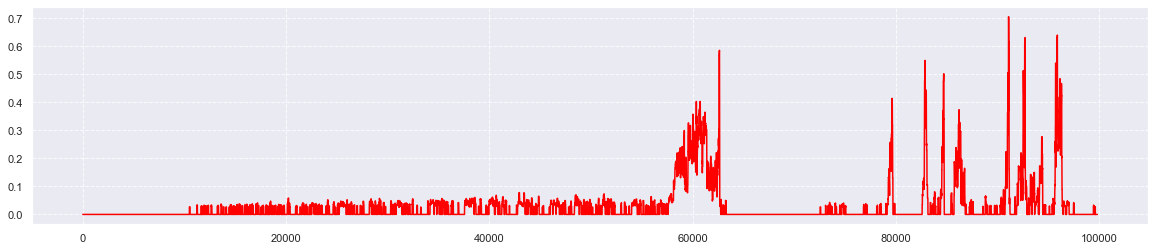

In [222]:
plt.figure(figsize=(20,4))
print(max(diff[0:5000]))
output=[]
for i in diff:
    if i>max(diff[0:5000]):
        output.append(i)
    else:
        output.append(0)
plt.plot(output, "red")
#ax[2].vlines(hatching_point, 0,np.max(diff), linestyles='--', color='orange', label='hatching point')
plt.grid(linestyle='--', alpha=0.8)
#ax[0].vlines(marked_point, 0,np.max(normBright_mean), linestyles='--', color='orange', label='hatching point Jonathan')

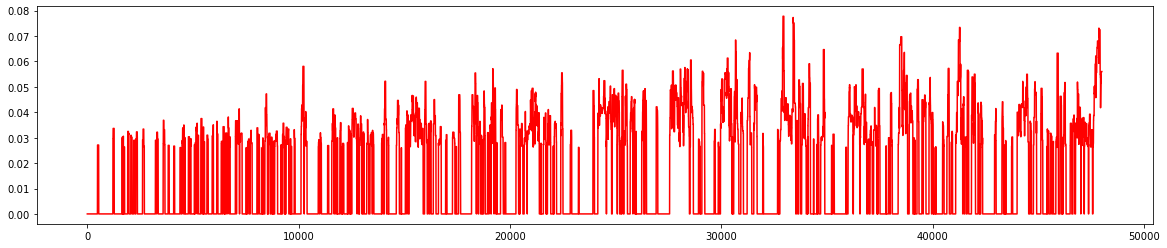

In [204]:
plt.figure(figsize=(20,4))
plt.plot(output[10000:58000],"red")

In [212]:
def thershold_trace(rawdata,hatching_point,threshold):
    data=rawdata[hatching_point:]
    count=0
    '''
    for i in range(len(data)):
        if i>=threshold:
            count+=1
    '''
    up=0
    for i in range(len(data)):
        if up==0:
            if data[i]>=threshold:
                count+=1
                up=1
        elif up==1:
            if data[i]<threshold:
                up=0
    return count

len(np.where(np.array(output[10000:58000])>=0.02)[0])

22499

In [ ]:
def normBright_MaxMin_diff(data,k):
    normBright = data / np.max(data)
    normBright_max = knn_norm(normBright, k,"max")
    normBright_mean = knn_norm(normBright, k, "mean")
    diff=normBright_max - normBright_mean
    normBright_mean1=knn_norm(diff,9000,"mean")
    return normBright,normBright_max,normBright_mean,diff,normBright_mean1
normBright,normBright_max,normBright_mean,diff,normBright_mean1=normBright_MaxMin_diff(np.array(data["Item3.avgBright"]),60)

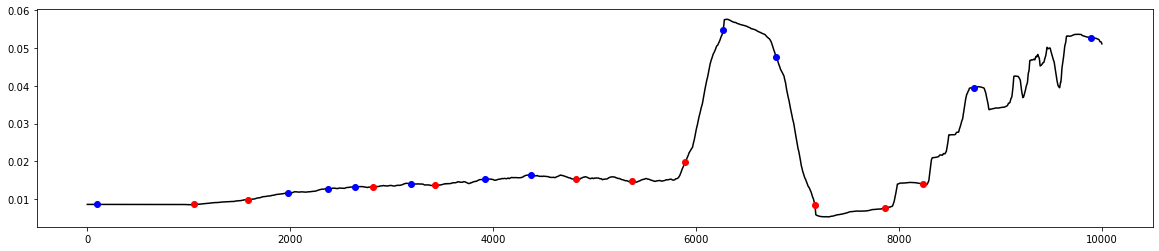

In [28]:
#normBright_mean1=knn_norm(diff,9000,"mean")
plt.figure(figsize=(20,4))
mins =find_peaks_cwt(normBright_mean1*-1,1000)
maxs =find_peaks_cwt(normBright_mean1,1000)
lenth=len(normBright_mean1)
x = np.linspace(0, 10000, len(normBright_mean1))
plt.plot(x, normBright_mean1, color='black')
plt.plot(x[mins], normBright_mean1[mins], 'o',color='red', label='mins')
plt.plot(x[maxs], normBright_mean1[maxs], 'o',color='blue', label='maxs')

46502


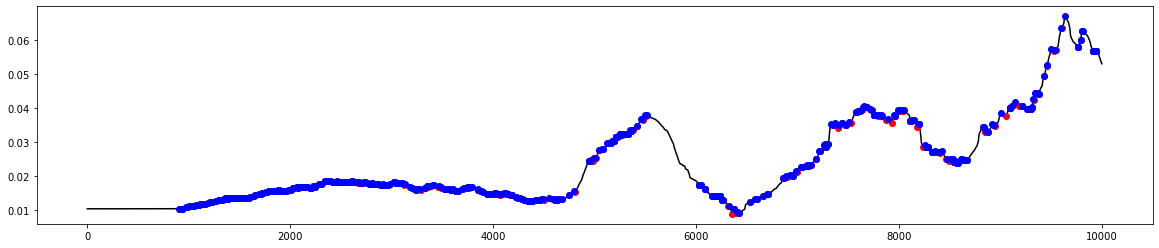

In [48]:
import scipy
print(marked_point[12])
normBright,normBright_max,normBright_mean,diff,normBright_mean1=normBright_MaxMin_diff(np.array(data["Item12.avgBright"]),60)
plt.figure(figsize=(20,4))
mins =scipy.signal.find_peaks(np.array(normBright_mean1*-1))[0]
maxs =scipy.signal.find_peaks(normBright_mean1)[0]
lenth=len(normBright_mean1)
x = np.linspace(0, 10000, len(normBright_mean1))
plt.plot(x, normBright_mean1, color='black')
plt.plot(x[mins], normBright_mean1[mins], 'o',color='red', label='mins')
plt.plot(x[maxs], normBright_mean1[maxs], 'o',color='blue', label='maxs')

In [54]:
np.array(data).shape

(99807, 24)

In [185]:
def all_plot(data,hatching_point,mode="general"):
    shape=np.array(data).shape
    gridsnum=shape[-1]
    vaildlenth=len(hatching_point[hatching_point!=0])
    f, ax = plt.subplots(vaildlenth, 1, figsize=(20, 5*vaildlenth))
    i=0
    if mode=="general":
        for j in range(gridsnum):
            if hatching_point[j+1]!=0:
                ax[i].set_title("Item"+str(j+1))
                ax[i].plot(data["Item"+str(j+1)+".avgBright"])
                ax[i].vlines(hatching_point[j+1], 10,90, linestyles='--', color='orange', label='Hatching point By Jonathan')
                ax[i].set_ylim(0,90)
                ax[i].grid()
                ax[i].legend()
                i+=1
    elif mode=="maxmin":
        for j in range(gridsnum):
            if hatching_point[j+1]!=0:
                ax[i].set_title("Item"+str(j+1))
                normBright = data["Item"+str(j+1)+".avgBright"] / np.max(data["Item"+str(j+1)+".avgBright"])
                normBright_max = knn_norm(normBright, 60,"max")
                ax[i].plot(normBright_max)
                normBright_min = knn_norm(normBright, 60, "min")
                ax[i].plot(normBright_min)
                ax[i].vlines(hatching_point[j+1], 0,np.max(normBright_max), linestyles='--', color='orange', label='Hatching point By Jonathan')
                ax[i].grid()
                ax[i].legend()
                i+=1

    elif mode=="smooth_diff":
        for j in range(gridsnum):
            if hatching_point[j+1]!=0:
                ax[i].set_title("Item"+str(j+1))
                normBright = data["Item"+str(j+1)+".avgBright"] / np.max(data["Item"+str(j+1)+".avgBright"])
                normBright_max = knn_norm(normBright, 60,"max")
                normBright_min = knn_norm(normBright, 60, "min")
                diff=knn_norm(normBright_max-normBright_min,8000,"mean")

                mins =find_peaks_cwt(diff**-1,150)
                maxs =find_peaks_cwt(diff,1000)
                x = np.linspace(0, len(diff), len(diff))

                increase_point=find_peak_(diff,maxs)

                auto_hatching_point=find_bottom(diff,mins,hatching_point[j+1])
                print(auto_hatching_point)
                ax[i].plot(x, diff, color='black')
                ax[i].plot(x[mins], diff[mins], 'o',color='red', label='mins')
                ax[i].plot(x[maxs], diff[maxs], 'o',color='blue', label='maxs')
                ax[i].vlines(hatching_point[j+1], 0,np.max(diff), linestyles='--', color='orange', label='Hatching point by Jonathan')
                ax[i].vlines(auto_hatching_point,0,np.max(diff),colors='orange',label='Auto predict hatching point')
                ax[i].vlines(increase_point,0,np.max(diff),colors='green',label='first peak point')
                ax[i].vlines(mins[np.where(mins<increase_point)[0]][-1],0,np.max(diff),colors='black',label='near bottom point')
                ax[i].grid()
                ax[i].legend()
                i+=1
def find_peak_(values,peaks):
    for i in range(len(peaks)):
        if values[peaks[i]]>values[peaks[i-1]]*2:
            return peaks[i]


def find_bottom(values,bottoms,peak):
    cut_bottoms=bottoms[np.where(bottoms<peak)[0]][::-1]
    for i in range(len(cut_bottoms)):
        #if values[cut_bottoms[i]]>values[cut_bottoms[+1]] and cut_bottoms[i]-cut_bottoms[i+1]<2500:
        if values[i+1]/values[i]<0.9:
            continue
        else:
            return cut_bottoms[i]

'''def find_bottom(values,bottoms,peak):
    current=0
    minimis=10000
    for i in bottoms:
        if abs(i-peak)<minimis:
            minimis=abs(i-peak)
            current=i
    return current'''

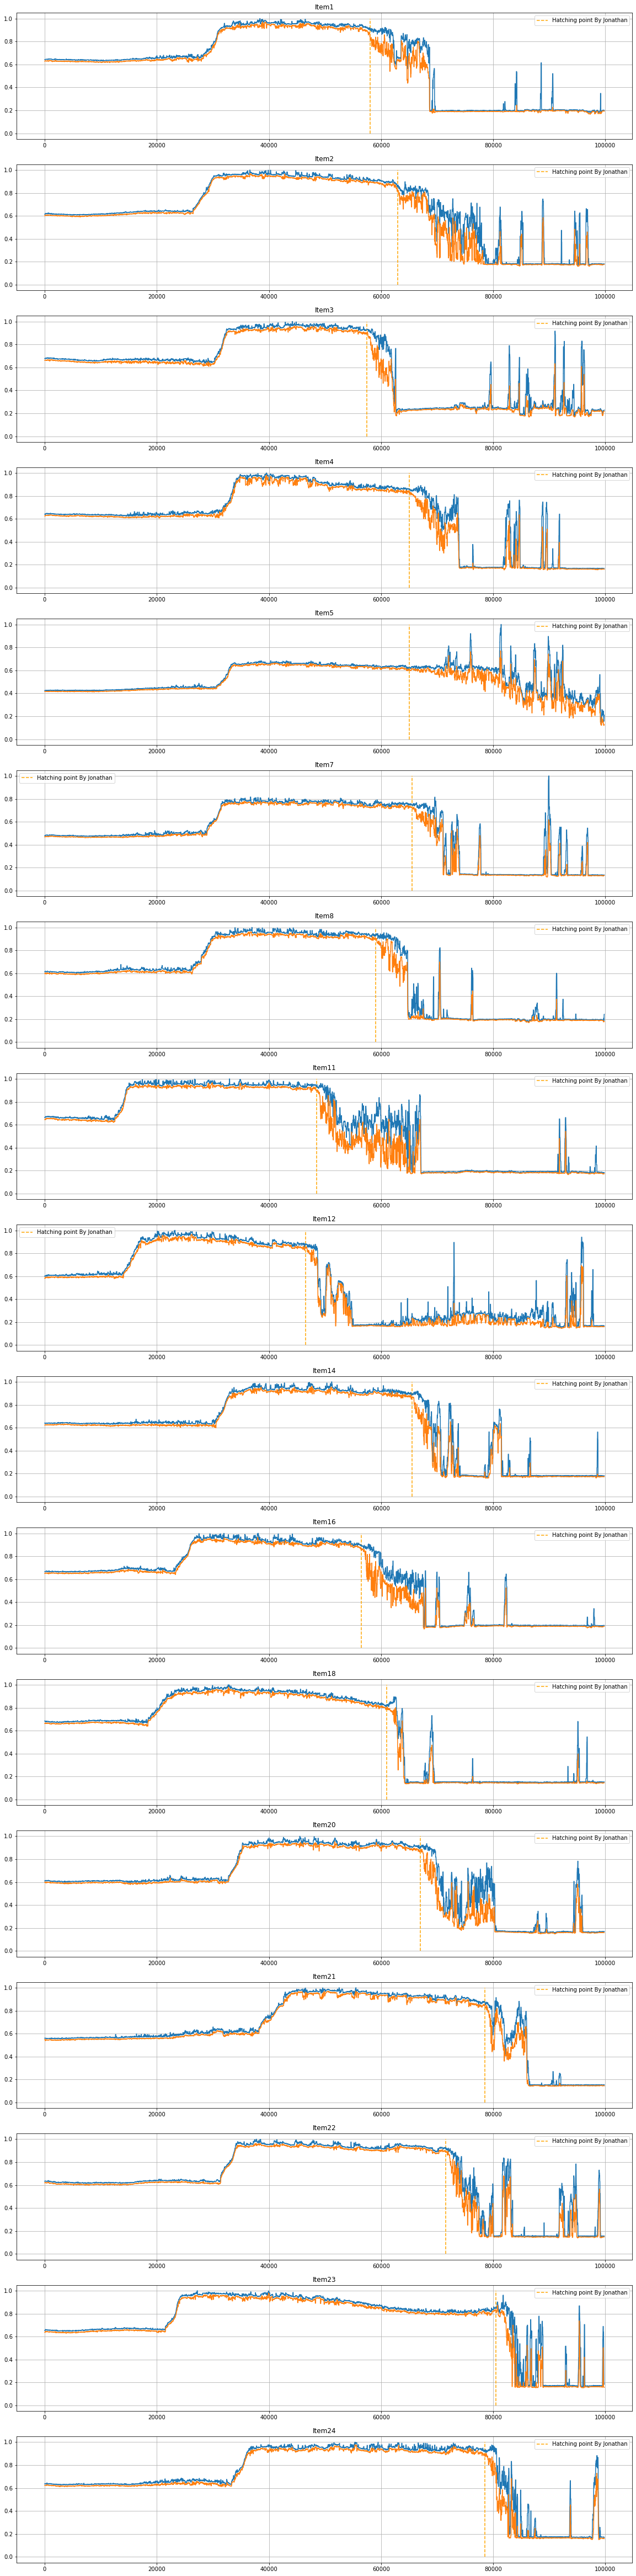

In [115]:

all_plot(data,marked_point,"maxmin")

58096
63094
57667
64557
63857
66194
59963
48228
45035
65900
55859
61373
67561
79471
72257
80544
79007


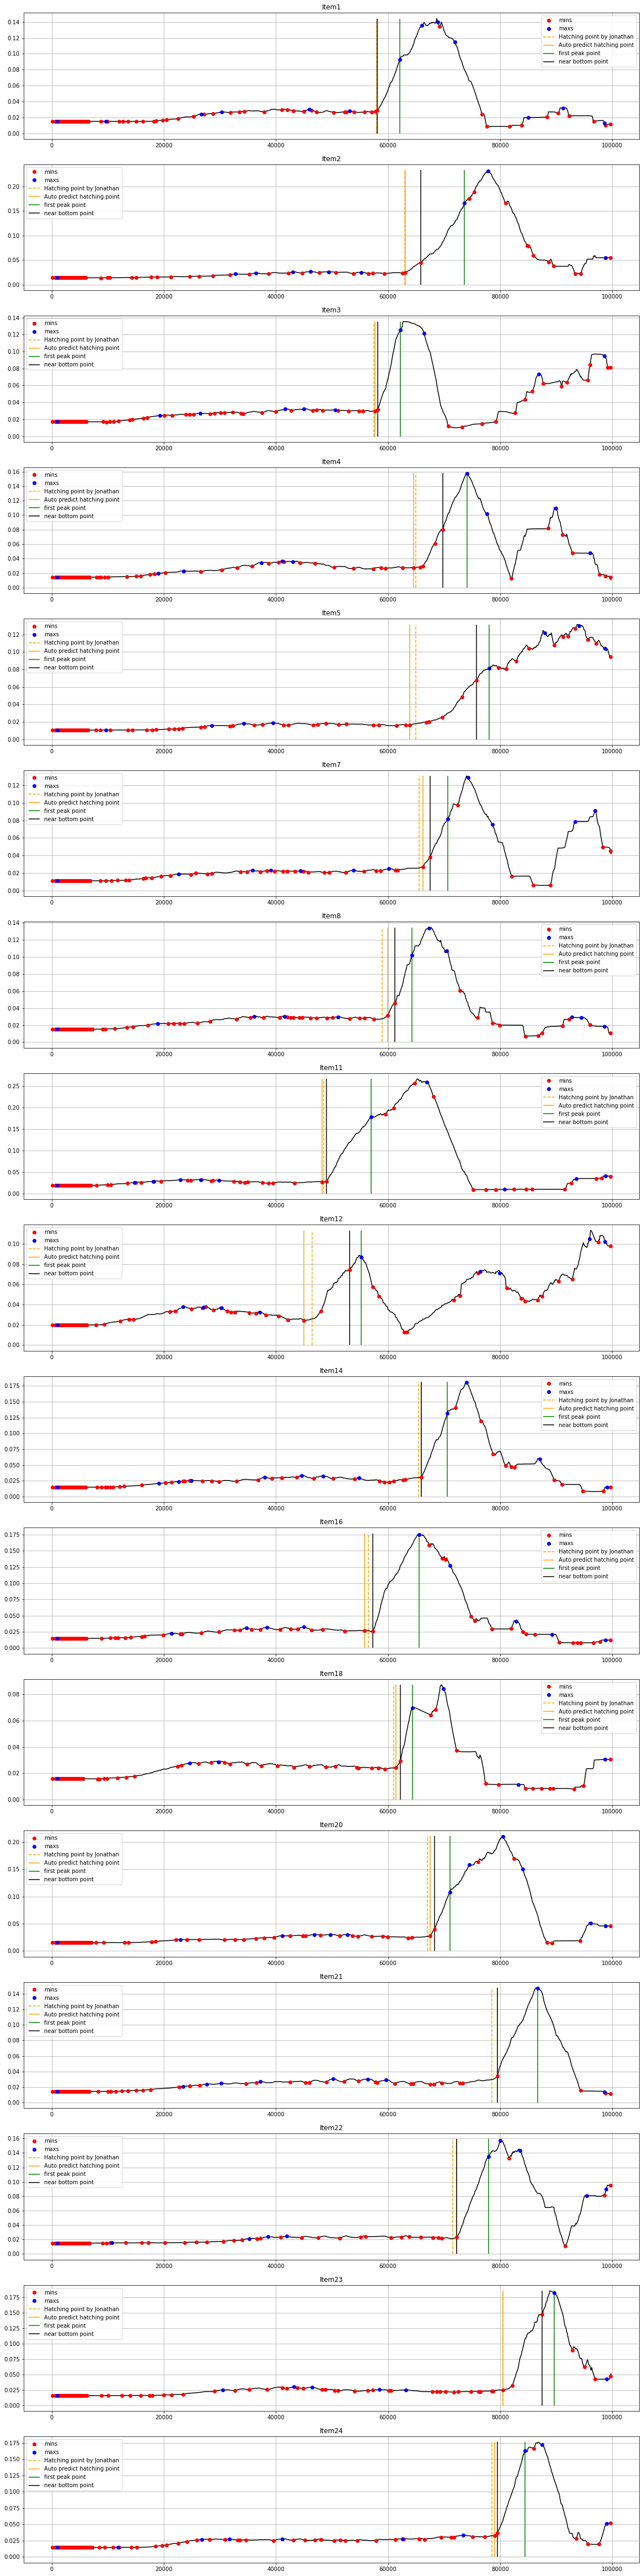

In [186]:
all_plot(data,marked_point,"smooth_diff")

In [190]:
results=[58096,63094,57667,64557,63857,66194,59963,48228,45035,65900,55859,61373,67561,79471,72257,80544,79007]
np.abs(np.mean(marked_point[np.where(marked_point!=0)]-results))

96.11764705882354

## 2.1 Noise remove


In [ ]:
noises_=[1294,508,830,311,922,4988,129,95,223,2366,212,83,999,49,5044,70,304]
import scipy
from scipy.fft import rfft,rfftfreq
test1=np.array(data["Item1.avgBright"])[:noises_[0]]
plt.figure(figsize=(20,5))
n    = len(test1)
yf   = rfft(test1)
data_step=1/noises_[0]
xf   = rfftfreq(n,data_step)
plt.grid()
plt.plot(xf,np.abs(yf))
plt.xlim(2)
plt.ylim(-1,100)
print(max(np.abs(yf)[2:]))

In [ ]:
test1=np.array(data["Item1.avgBright"])
plt.figure(figsize=(20,5))

## 2 Threshold each trace (value determined by eye) and values above threshold are considered movement and summed.

In [ ]:
from fastsst import SingularSpectrumTransformation
def plot_data_and_score(raw_data, score):
    f, ax = plt.subplots(2, 1, figsize=(20, 10))
    ax[0].plot(raw_data)
    ax[0].set_title("raw data")
    ax[1].plot(score, "r")
    ax[1].set_title("score")
    ax[1].set_ylim(0,0.0001)

normBright=np.array(data["Item1.avgBright"])/np.array(data["Item1.avgBright"]).max()

score = SingularSpectrumTransformation(win_length=30, n_components=2, use_lanczos=True).score_offline(np.array(normBright))
plot_data_and_score(normBright, score)

In [ ]:
def thershold_trace(rawdata,hatching_point,threshold):
    data=rawdata[hatching_point:]
    count=0
    '''
    for i in range(len(data)):
        if i>=threshold:
            count+=1
    '''
    up=0
    for i in range(len(data)):
        if up==0:
            if data[i]>=threshold:
                count+=1
                up=1
        elif up==1:
            if data[i]<threshold:
                up=0
    return count


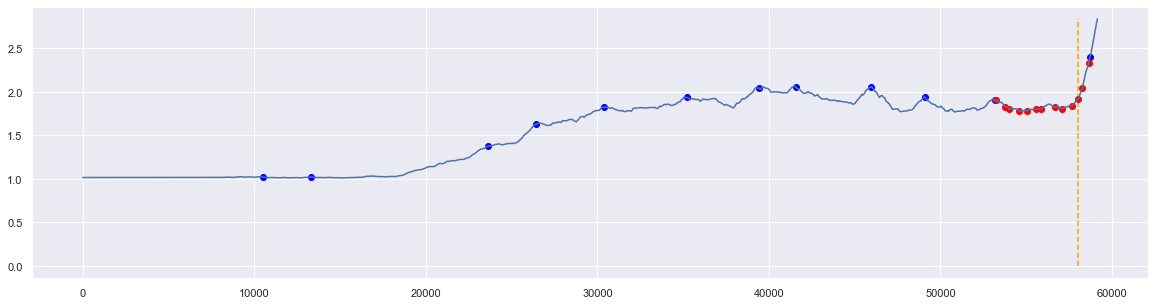

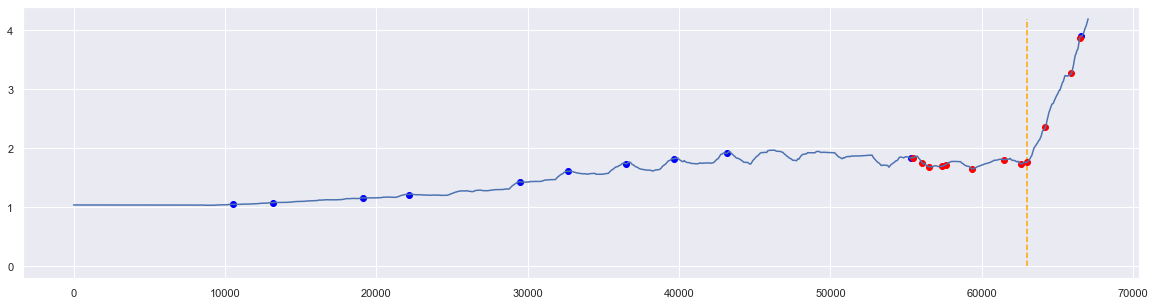

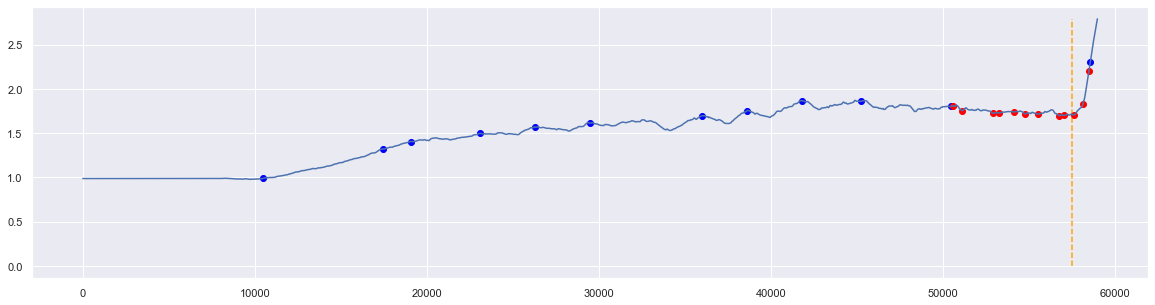

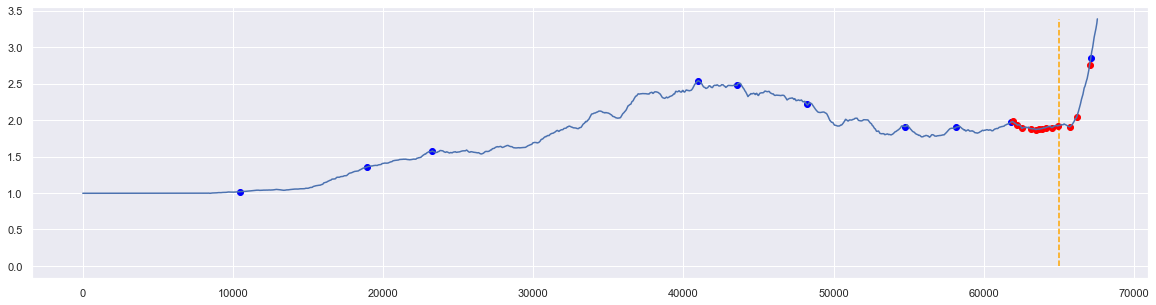

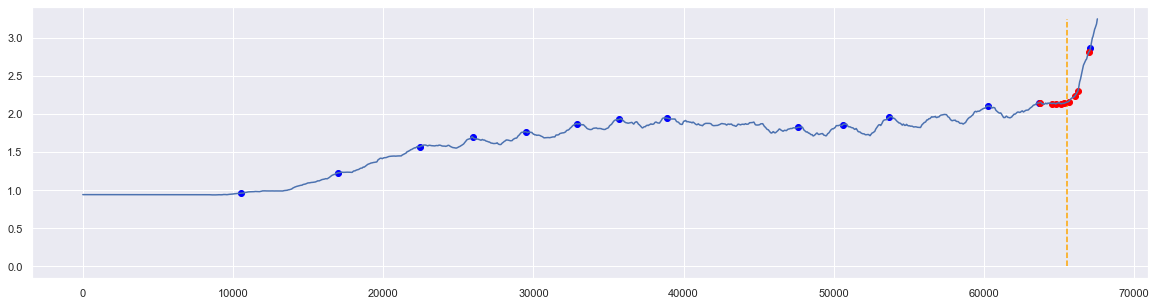

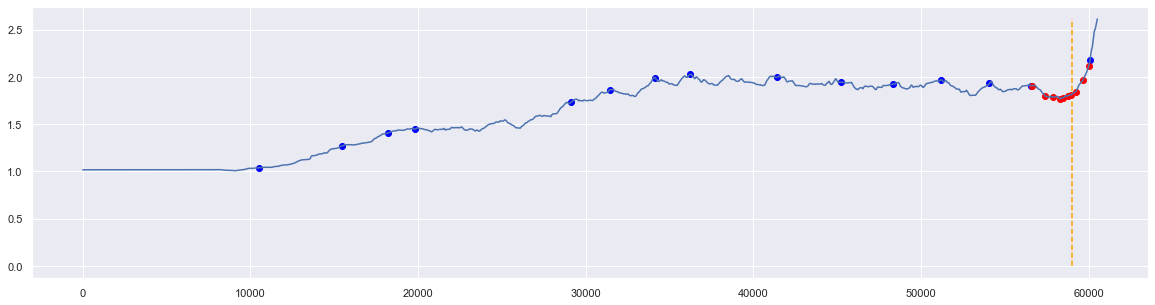

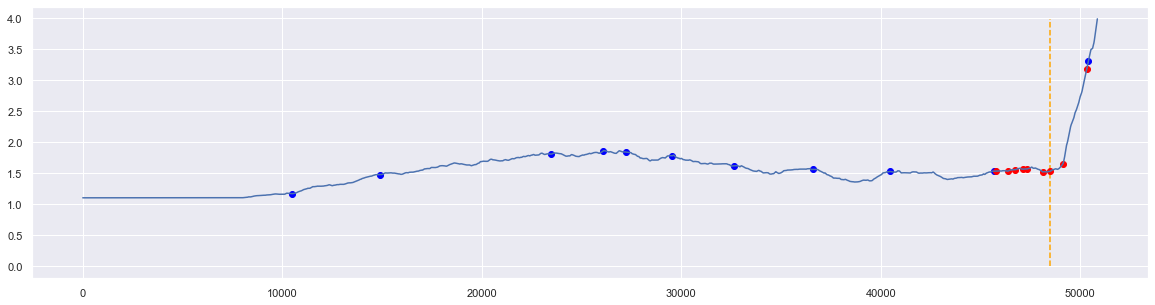

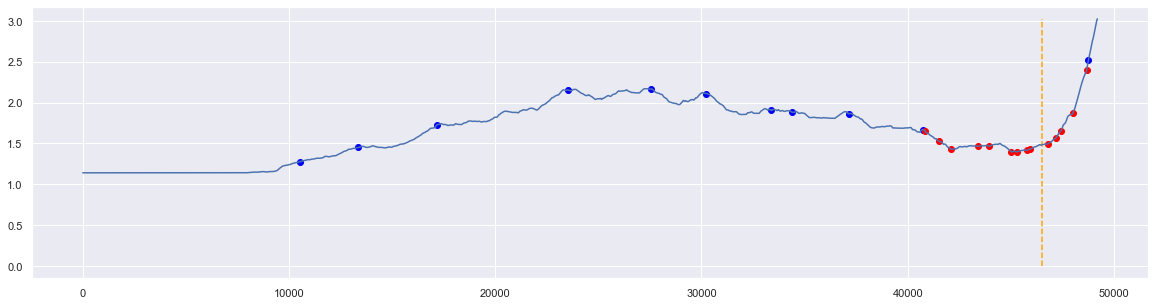

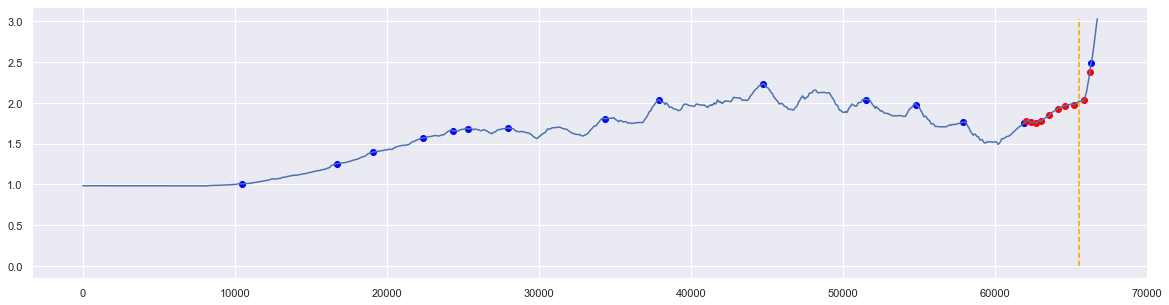

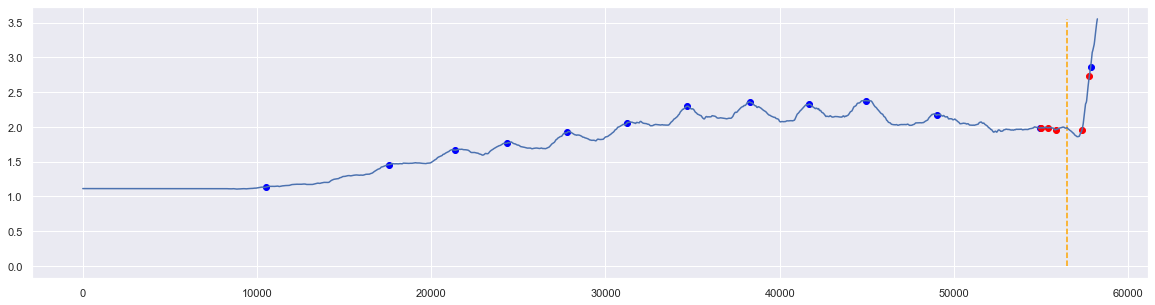

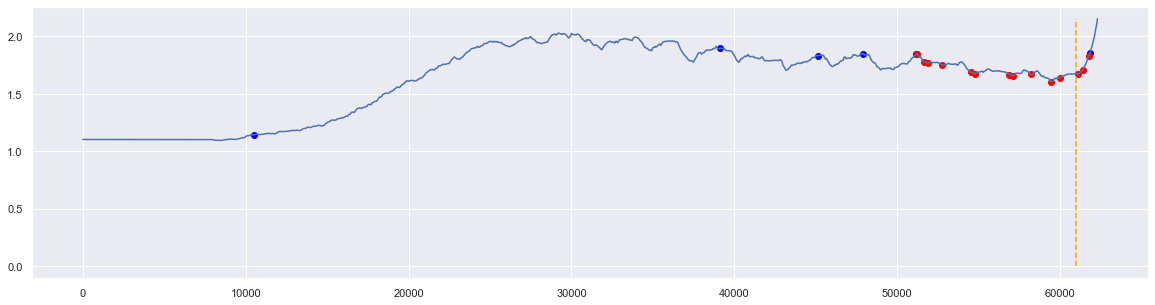

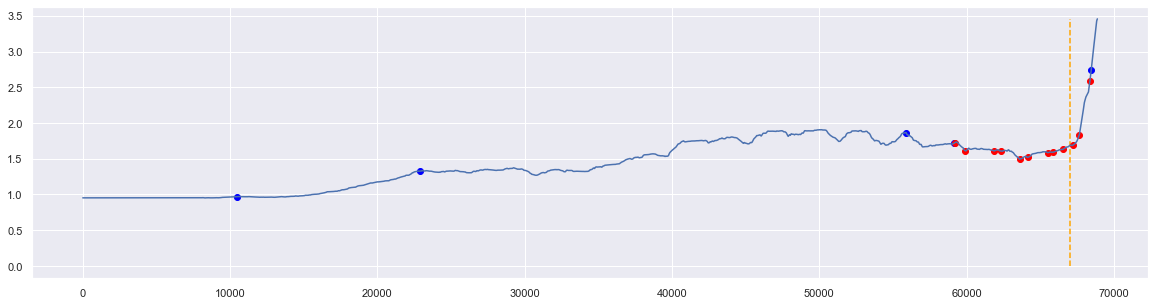

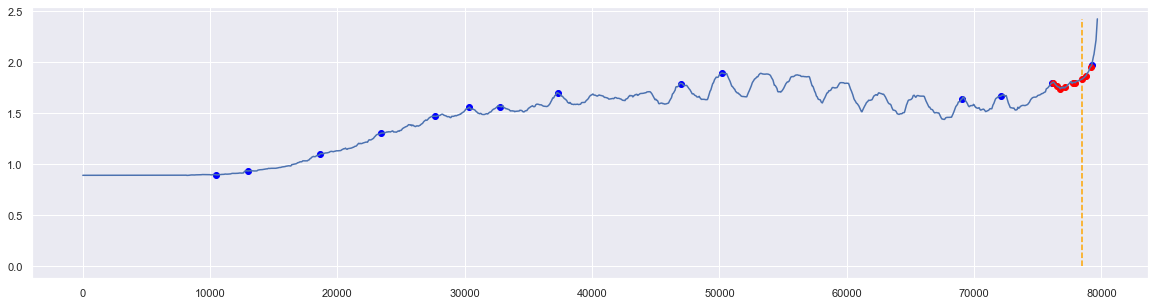

KeyboardInterrupt: 

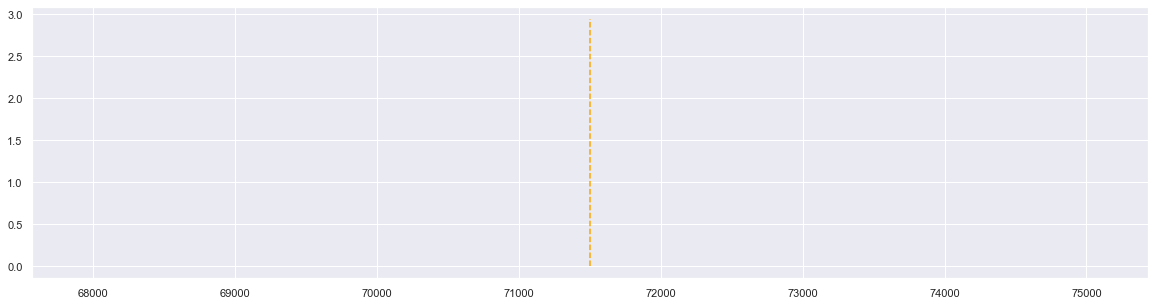

In [297]:
for j in range(24):
    if marked_point[j+1]!=0:
        no=j+1
        plt.figure(figsize=(20,5))
        current=np.array(data["Item"+str(no)+".avgBright"])
        #normBright,normBright_max,normBright_mean,diff,normBright_mean1=normBright_MaxMin_diff(np.array(data["Item3.avgBright"]),60)
        norm_max=knn_norm(current, 60,"max")
        norm_min=knn_norm(current, 60,"min")
        diff=norm_max-norm_min
        ndiff=knn_norm(diff,8000,"mean")
        #plt.hlines(np.mean(ndiff)*1.2,0,len(ndiff),colors='orange')

        increase_point=np.where(ndiff>np.mean(ndiff)*1.2)[0][0]
        #plt.vlines(increase_point,0,np.max(ndiff),colors='green',label='first peak point')
        cut=ndiff[:increase_point]
        plt.vlines(marked_point[no], 0,np.max(cut), linestyles='--', color='orange', label='Hatching point by Jonathan')

        x = np.linspace(0, len(cut), len(cut))



        maxs =find_peaks_cwt(cut[10000:],500)
        plt.plot(x[maxs+10000], ndiff[maxs+10000], 'o',color='blue', label='maxs')

        cuted=maxs[-2]+10000
        cut=cut[maxs[-2]+10000:maxs[-1]+10000]
        mins =find_peaks_cwt(cut**-1,80)
        plt.plot(x[mins+cuted], ndiff[mins+cuted], 'o',color='red', label='mins')
        '''
        plt.vlines(marked_point[no], 0,np.max(diff), linestyles='--', color='orange', label='Hatching point by Jonathan')
        maxs =find_peaks_cwt(ndiff,1000)
        increase_point=find_peak_(ndiff,maxs)

        x = np.linspace(0, len(diff), len(diff))
        print(maxs)
        plt.plot(x[maxs], diff[maxs], 'o',color='blue', label='maxs')
        plt.vlines(increase_point,0,np.max(diff),colors='green',label='first peak point')
        print(increase_point)
        diff[np.where(diff<=np.max(diff[:2500]))[0]]=0.001
        out=knn_norm(diff, 1000,"max")
        cut=out[:increase_point][::-1]
        mins =find_peaks_cwt(cut**-1,100)
        print(mins)
        plt.plot(x[mins], diff[mins], 'o',color='red', label='mins')
        for i in range(len(cut)):
            if cut[i]*1.05 < cut[i+1]:
                predict=i
                print(predict)
                break
        plt.vlines(increase_point-predict,0,np.max(diff),colors='orange',label='Auto predict hatching point')'''
        plt.plot(ndiff[:increase_point])
        plt.show()


C:\Users\Alex\AppData\Local\Temp/ipykernel_2056/3439897465.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  plt.plot(diff**-1)


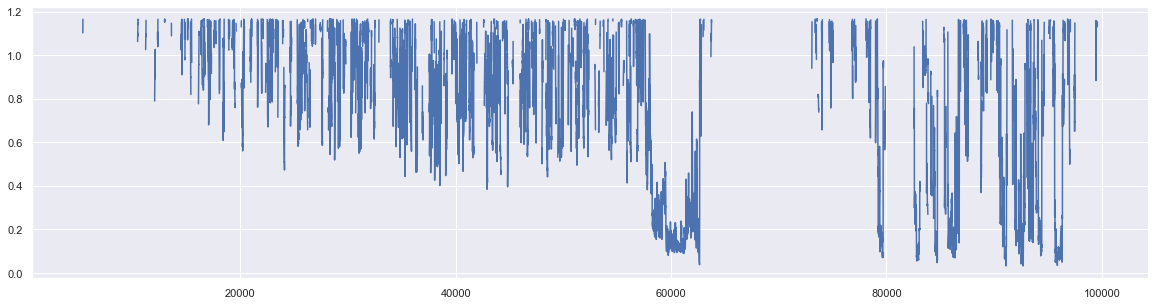

In [275]:
plt.figure(figsize=(20,5))
plt.plot(diff**-1)

In [232]:
aa=np.array([1,2,3,4,5,6,7,0,0,1,1,1,1,1,2,7,7,7,7,7,])
aa[np.where(aa<=3)[0]]=0
aa

array([0, 0, 0, 4, 5, 6, 7, 0, 0, 0, 0, 0, 0, 0, 0, 7, 7, 7, 7, 7])